In [35]:
import pandas as pd
import numpy as np
import pickle
from tqdm import *
from scipy.stats import spearmanr
import statsmodels.api as sm
from scipy import stats

# 关闭通知
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from mpl_finance import candlestick_ochl
import mplfinance as mpf
from kaki.kkdatac.crypto import get_pairs, get_price

# Crypto pairs list
pairs = get_pairs("kline-1D")

data = get_price(pairs, bar="1D",fields=['open','high','low','close','instId'])

100%|██████████| 493/493 [00:09<00:00, 52.11it/s]


In [36]:
# Date is ISO date
data['date'] = data['timestamp'].dt.date

In [37]:
data.drop(columns=['timestamp'],inplace=True)

In [38]:

data = data.set_index(["instId","date"])

In [39]:
from datetime import date

end = date.fromisoformat('2022-02-14')
start = end - pd.Timedelta(days=60)


In [40]:
start, end

(datetime.date(2021, 12, 16), datetime.date(2022, 2, 14))

In [41]:
stock_a = data.loc['BTC-USDT-SWAP'].loc[start:end].copy()
stock_a.index = date2num(stock_a.index)
stock_a.index.names = ['date']
quotes = stock_a[['open','close','high','low']].reset_index().set_index(['date','open','close','high','low']).index.tolist()


In [42]:
quotes

[(18977.0, 48593.1, 46500.0, 48723.7, 45407.1),
 (18978.0, 46505.7, 46857.9, 47449.9, 45487.7),
 (18979.0, 46857.8, 47249.0, 48385.8, 46321.0),
 (18980.0, 47247.6, 45983.6, 47569.9, 45561.0),
 (18981.0, 45983.5, 48419.0, 49300.0, 45876.4),
 (18982.0, 48419.0, 48893.6, 49600.0, 48335.4),
 (18983.0, 48893.6, 48803.5, 49269.3, 48035.7),
 (18984.0, 48804.6, 50955.7, 51500.0, 48676.2),
 (18985.0, 50955.7, 50671.4, 51845.6, 50501.1),
 (18986.0, 50675.8, 50043.8, 51166.4, 49382.2),
 (18987.0, 50048.3, 51437.1, 51680.0, 49914.4),
 (18988.0, 51439.6, 48955.8, 52099.4, 48200.0),
 (18989.0, 48942.4, 47947.4, 48980.0, 46567.8),
 (18990.0, 47947.4, 47182.3, 48040.5, 45888.0),
 (18991.0, 47182.3, 48021.8, 48578.0, 46714.0),
 (18992.0, 48021.8, 47211.7, 48130.1, 45656.1),
 (18993.0, 47211.7, 47343.1, 47947.0, 46777.0),
 (18994.0, 47344.2, 46697.3, 48003.6, 46568.9),
 (18995.0, 46697.3, 46932.8, 47521.0, 45681.0),
 (18996.0, 46932.9, 46621.3, 47088.9, 45510.0),
 (18997.0, 46621.8, 42944.7, 46673.8, 42

([<matplotlib.lines.Line2D at 0x30e976920>,
  <matplotlib.patches.Rectangle at 0x30e7a2320>])

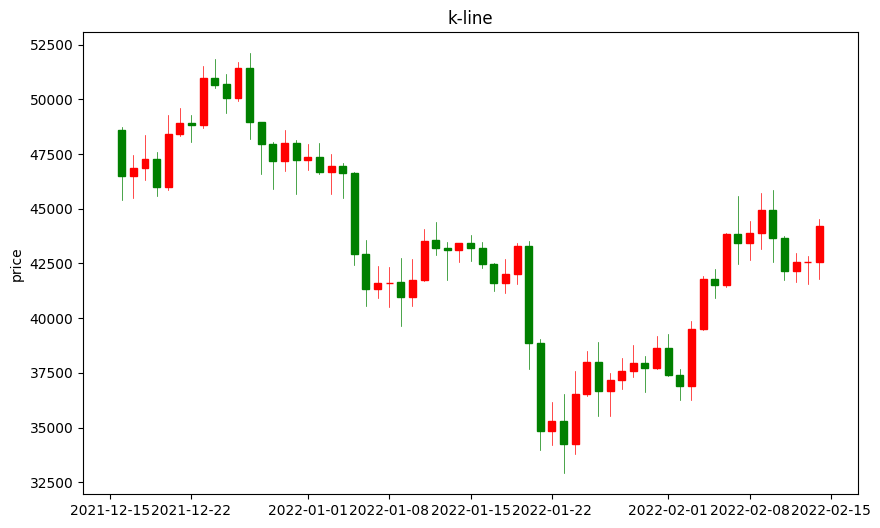

In [43]:
fig,ax = plt.subplots(figsize = (10,6),facecolor = 'white')
ax.xaxis_date()

plt.yticks()
plt.title('k-line')
plt.ylabel('price')

candlestick_ochl(ax,quotes,colorup = 'r',width = 0.6,colordown = 'g')

In [62]:
def get_previous_trading_date(end_date: str, n=1):
    end = date.fromisoformat(end_date)
    start = end - pd.Timedelta(days=60)
    return start, end
def k_line(data, instId, end_date, length=60):
    df = data.copy()
    start, end = get_previous_trading_date(end_date, length)
    print(f"start: {start}, end: {end}")
    stock_a = df.loc[instId].loc[start:end].copy()
    stock_a.index = date2num(stock_a.index)
    stock_a.index.names = ['date']
    quotes = stock_a[['open','close','high','low']].reset_index().set_index(['date','open','close','high','low']).index.tolist()

    if len(quotes) < 5:
        print("Not enough data to plot")
        return
    fig,ax = plt.subplots(figsize = (10,6),facecolor = 'white')
    ax.xaxis_date()

    plt.yticks()
    plt.title(f'k-line-{instId}-{start}-{end}')
    plt.ylabel('price')

    candlestick_ochl(ax,quotes,colorup = 'r',width = 0.6,colordown = 'g')
    plt.show()

def k_line_mpf(data, instId, end_date, length=60):
    df = data.copy()
    start, end = get_previous_trading_date(end_date, length)
    print(f"start: {start}, end: {end}")
    stock_a = df.loc[instId].loc[start:end].copy()
    # Datetime index
    stock_a.index = pd.to_datetime(stock_a.index)
    mpf.plot(stock_a,type='candle',style='charles',mav=(5,10,20),volume=False,title=f'Crypto K-Line Chart:{instId}-{start}-{end})')
    plt.show()

start: 2024-01-01, end: 2024-03-01


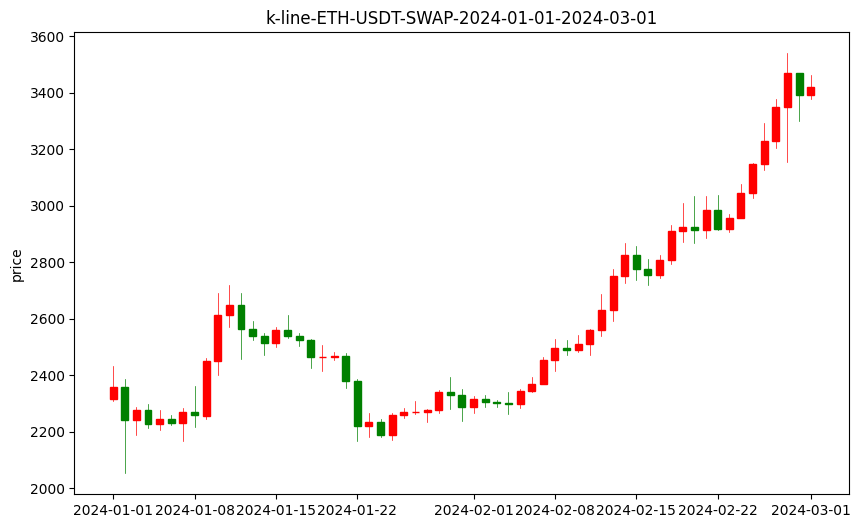

start: 2024-01-01, end: 2024-03-01


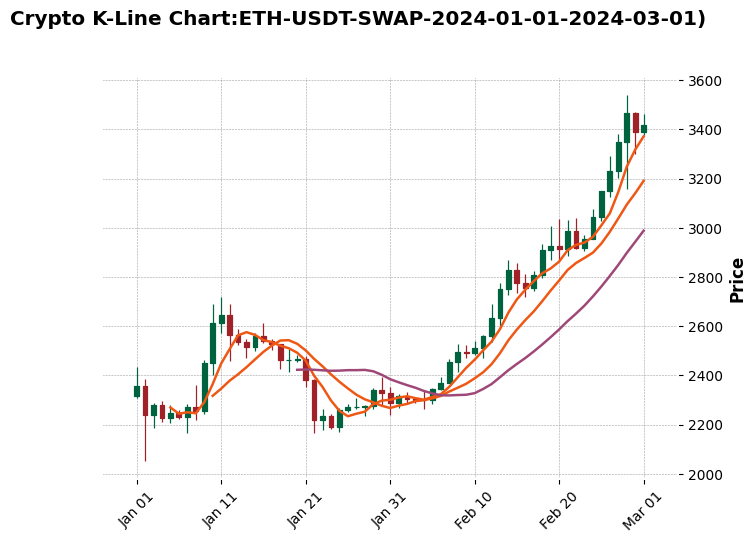

In [63]:
k_line(data,'ETH-USDT-SWAP',"2024-03-01")
k_line_mpf(data,'ETH-USDT-SWAP',"2024-03-01")

In [64]:
stock_a = data.loc['ETH-USDT-SWAP']
stock_b = data.loc['BTC-USDT-SWAP']
T = stock_a.corrwith(stock_b).mean()
T

0.897566924327648

start: 2024-01-01, end: 2024-03-01


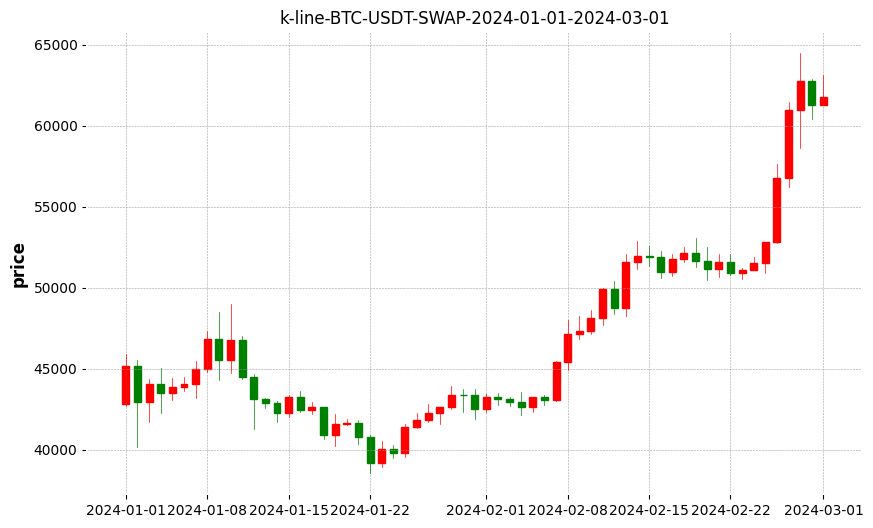

In [65]:
k_line(data,'BTC-USDT-SWAP',"2024-03-01")

In [66]:
data

open    high     low   close
instId        date                                      
1INCH-USDT    2020-12-24  2.0000  2.9620  1.5720  1.8850
              2020-12-25  1.8820  2.5700  1.5730  1.6420
              2020-12-26  1.6450  1.8000  1.1620  1.3570
              2020-12-27  1.3570  1.4420  1.0420  1.1690
              2020-12-28  1.1710  1.1710  0.7710  0.8000
...                          ...     ...     ...     ...
ZRX-USDT-SWAP 2024-03-06  0.4747  0.5751  0.4661  0.5126
              2024-03-07  0.5124  0.5484  0.4889  0.5203
              2024-03-08  0.5204  0.5809  0.5132  0.5666
              2024-03-09  0.5666  0.8159  0.5633  0.7788
              2024-03-10  0.7789  1.0867  0.7578  0.8629

[458314 rows x 4 columns]

In [70]:
dt = pd.DataFrame(columns=['stock','startdate','enddate','T'])
stock = 'BTC-USDT-SWAP'
end = '2024-01-01'
start,end = get_previous_trading_date(end,59)
df = data.copy()
stock_a = df.loc[stock].loc[start:end].copy()

stocklist = sorted(set(data.index.get_level_values(0)))
datelist = sorted(set(data.index.get_level_values(1)))

y = 0
for s in tqdm(stocklist):
    stock_b = data.loc[s]
    for d in datelist[60:-20:20]:
        end = d
        start = end - pd.Timedelta(days=60)
        temp_k_line = stock_b.loc[start:end].reset_index().iloc[:,1:]
        T = stock_a.reset_index().iloc[:,1:].corrwith(temp_k_line).mean()
        dt.loc[y] = [s,start,end,T]

        y += 1

dt = dt.fillna(0)
dt = dt.sort_values(by='T',ascending=False)
dt

100%|██████████| 493/493 [02:15<00:00,  3.65it/s]


,stock,startdate,enddate,T
5881,BABYDOGE-USDT,2021-06-11,2021-08-10,1.000000
21182,GEAR-USDT,2022-10-24,2022-12-23,1.000000
21277,GF-USDT,2021-10-09,2021-12-08,1.000000
680,ACE-USDT,2023-10-19,2023-12-18,1.000000
36437,OMG-USDT,2021-08-30,2021-10-29,0.954118
...,...,...,...,...
9430,BTC-USDT,2022-04-07,2022-06-06,-0.965560
16954,ERN-USDT,2022-04-07,2022-06-06,-0.965841
52864,WNCG-USDT,2022-04-07,2022-06-06,-0.967668
53890,XEM-USDT,2022-04-07,2022-06-06,-0.970640


GEAR-USDT 2022-12-23
start: 2022-10-24, end: 2022-12-23
Not enough data to plot
GF-USDT 2021-12-08
start: 2021-10-09, end: 2021-12-08
Not enough data to plot
ACE-USDT 2023-12-18
start: 2023-10-19, end: 2023-12-18
Not enough data to plot
OMG-USDT 2021-10-29
start: 2021-08-30, end: 2021-10-29


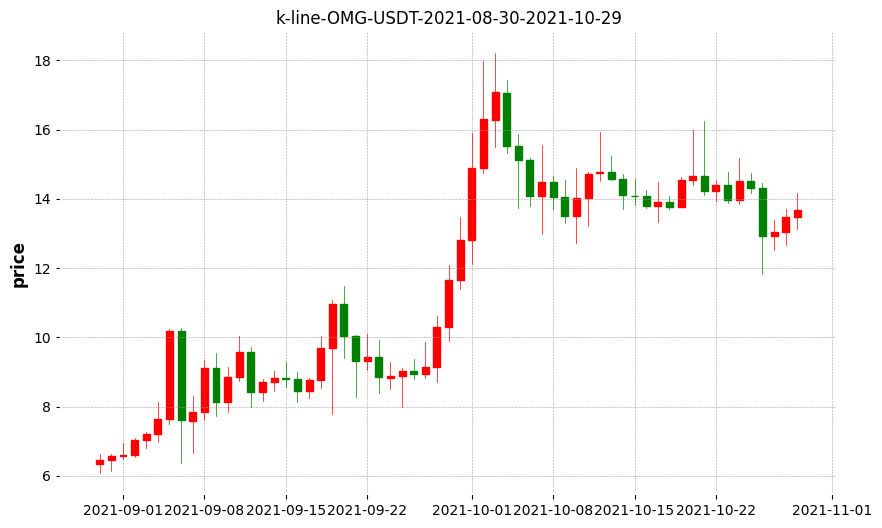

In [71]:
for i in range(1,5):
    Tdt = dt.iloc[i]                         #获取相似度最高的值所在行
    stock = Tdt.stock                        #获取对应股票
    enddate = str(Tdt.enddate)                 #获取对应结束时间
    print(stock,enddate)
    k_line(data,stock,enddate)

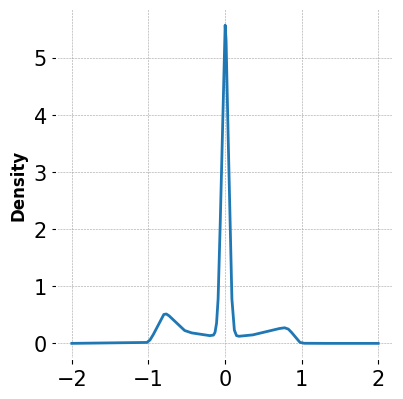

In [73]:
dt['T'].plot(kind = 'density', subplots = True, layout=(2,4), sharex = False , figsize = (20,10), fontsize = 15)
plt.show()

[Text(0, -1, '-1'), Text(0, 0, '0'), Text(0, 1, '1')]

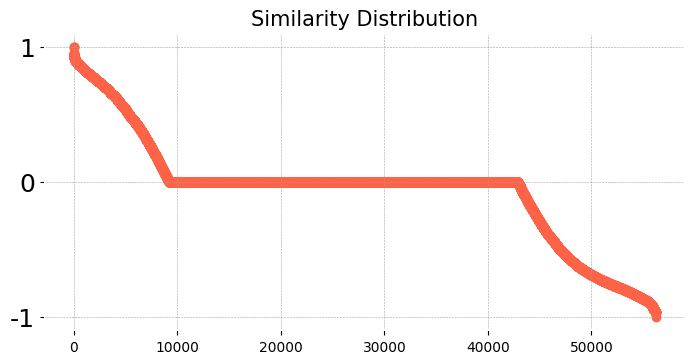

In [88]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) 
x=range(0,len(list(dt.index)))
y=list(dt['T'])
axes.scatter(x,y,color='tomato')
axes.set_title('Similarity Distribution',fontsize=15)

#设置Y轴
axes.set_yticks([-1,0,1])
axes.set_yticklabels(['-1','0','1'], fontsize=18)

In [75]:
s = 1
d = 0.2
sdf = pd.DataFrame(columns=['min','max','数量'])
for t in range(0,10):
    s = round(s-d,2)
    mn=s
    mx=s+d
    num = len(dt[(dt['T']>mn)&(dt['T']<mx)])
    sdf.loc[s]=[mn,mx,num]
sdf

,min,max,数量
0.8,0.8,1.0,1501.0
0.6,0.6,0.8,2818.0
0.4,0.4,0.6,2005.0
0.2,0.2,0.4,1543.0
0.0,0.0,0.2,1352.0
-0.2,-0.2,0.0,1394.0
-0.4,-0.4,-0.2,1648.0
-0.6,-0.6,-0.4,2396.0
-0.8,-0.8,-0.6,4890.0
-1.0,-1.0,-0.8,2996.0


In [76]:
len(dt[(dt['T']>0.3)&(dt['T']<0.6)])

2810

[Text(0, 0, '1.0~0.8'),
 Text(1, 0, '0.8~0.6'),
 Text(2, 0, '0.6~0.4'),
 Text(3, 0, '0.4~0.2'),
 Text(4, 0, '0.2~0.0'),
 Text(5, 0, '0.0~-0.2'),
 Text(6, 0, '-0.2~-0.4'),
 Text(7, 0, '-0.4~-0.6'),
 Text(8, 0, '-0.6~-0.8'),
 Text(9, 0, '-0.8~-1.0')]

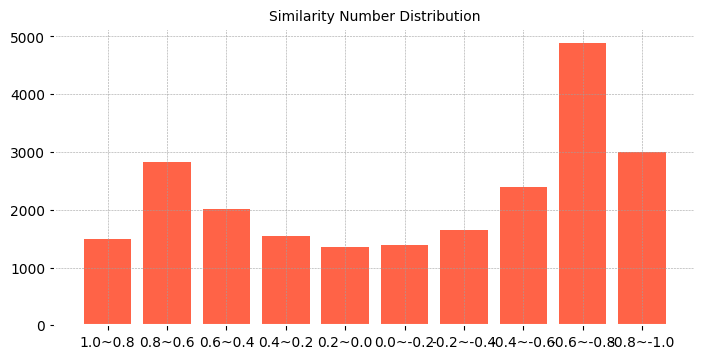

In [79]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) 
x=range(0,10)
y=list(sdf['数量'])
axes.bar(x,y,color ='tomato')
axes.set_title('Similarity Number Distribution',fontsize = 10)

#设置Y轴
axes.set_xticks(x)
axes.set_xticklabels(['1.0~0.8','0.8~0.6','0.6~0.4','0.4~0.2','0.2~0.0','0.0~-0.2','-0.2~-0.4','-0.4~-0.6','-0.6~-0.8','-0.8~-1.0'], fontsize=10)

In [80]:
highdt = dt[dt['T']>0.7]
highdt['code'] = highdt.index
highdt

,stock,startdate,enddate,T,code
5881,BABYDOGE-USDT,2021-06-11,2021-08-10,1.000000,5881
21182,GEAR-USDT,2022-10-24,2022-12-23,1.000000,21182
21277,GF-USDT,2021-10-09,2021-12-08,1.000000,21277
680,ACE-USDT,2023-10-19,2023-12-18,1.000000,680
36437,OMG-USDT,2021-08-30,2021-10-29,0.954118,36437
...,...,...,...,...,...
183,1INCH-USDT-SWAP,2021-07-21,2021-09-19,0.700286,183
8391,BNT-USDT-SWAP,2021-07-21,2021-09-19,0.700124,8391
17769,EURT-USDT,2023-03-13,2023-05-12,0.700098,17769
30808,LSK-USDT,2019-04-23,2019-06-22,0.700092,30808


In [83]:
data

open    high     low   close
instId        date                                      
1INCH-USDT    2020-12-24  2.0000  2.9620  1.5720  1.8850
              2020-12-25  1.8820  2.5700  1.5730  1.6420
              2020-12-26  1.6450  1.8000  1.1620  1.3570
              2020-12-27  1.3570  1.4420  1.0420  1.1690
              2020-12-28  1.1710  1.1710  0.7710  0.8000
...                          ...     ...     ...     ...
ZRX-USDT-SWAP 2024-03-06  0.4747  0.5751  0.4661  0.5126
              2024-03-07  0.5124  0.5484  0.4889  0.5203
              2024-03-08  0.5204  0.5809  0.5132  0.5666
              2024-03-09  0.5666  0.8159  0.5633  0.7788
              2024-03-10  0.7789  1.0867  0.7578  0.8629

[458314 rows x 4 columns]

In [84]:
closedf = data.close.unstack('instId')

highdt['buyprice'] = highdt['code'].apply(lambda x:closedf[list(highdt['stock'])[list(highdt['code']).index(x)]].iloc[closedf.index.tolist().index(pd.Timestamp(list(highdt['enddate'])[list(highdt['code']).index(x)]))])
highdt = highdt[highdt['buyprice']!=0]
highdt['5day'] = highdt['code'].apply(lambda x:closedf[list(highdt['stock'])[list(highdt['code']).index(x)]].iloc[closedf.index.tolist().index(pd.Timestamp(list(highdt['enddate'])[list(highdt['code']).index(x)]))+5])
highdt['20day'] = highdt['code'].apply(lambda x:closedf[list(highdt['stock'])[list(highdt['code']).index(x)]].iloc[closedf.index.tolist().index(pd.Timestamp(list(highdt['enddate'])[list(highdt['code']).index(x)]))+20])
highdt['5day']=highdt['5day']/highdt['buyprice']-1
highdt['20day']=highdt['20day']/highdt['buyprice']-1
highdt

ValueError: Timestamp('2021-08-10 00:00:00') is not in list

In [85]:
highdt.describe()

,T,code
count,3057.000000,3057.000000
mean,0.800724,27922.719660
std,0.060724,16233.824441
min,0.700080,58.000000
25%,0.748399,13967.000000
50%,0.798564,28302.000000
75%,0.848367,41721.000000
max,1.000000,56197.000000


KeyError: '5day'

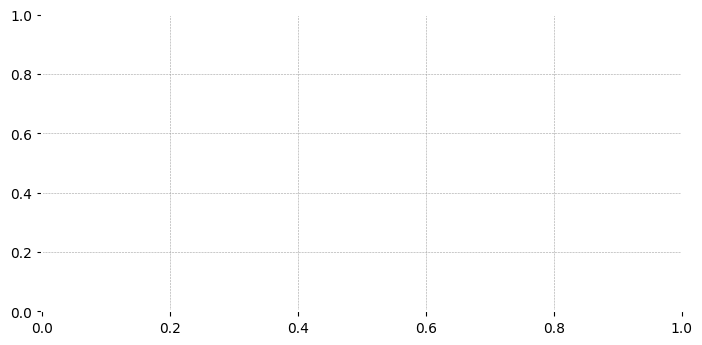

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) #插入面板2
x1_list = list(highdt['5day'])
y=np.array(x1_list)
x=np.array(range(0,len(x1_list)))
axes.plot(x, y, 'r')
axes.set_xlabel('相似度递减',fontsize=15)
axes.set_ylabel('收益率',fontsize=15)
axes.set_title('上涨中继买入后五日收益率',fontsize=15)

KeyError: '20day'

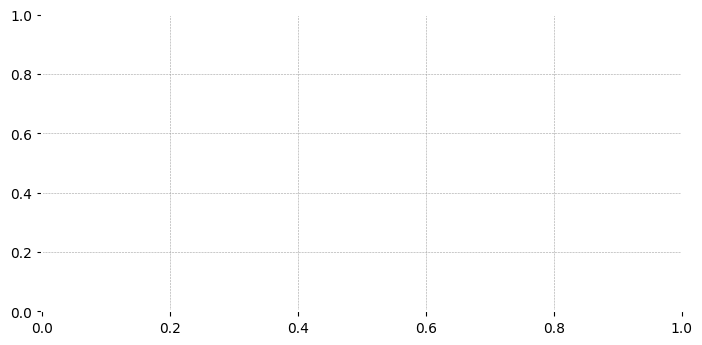

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) #插入面板2
x1_list = list(highdt['20day'])
y=np.array(x1_list)
x=np.array(range(0,len(x1_list)))
axes.plot(x, y, 'r')
axes.set_xlabel('相似度递减',fontsize=15)
axes.set_ylabel('收益率',fontsize=15)
axes.set_title('上涨中继买入后二十日收益率',fontsize=15)